









































































































































![pawel-czerwinski-lWBZ01XRRoI-unsplash.jpg](attachment:pawel-czerwinski-lWBZ01XRRoI-unsplash.jpg)

#  introduction to the  Plant Disease Recognition Dataset
This dataset contains three labels: **Healthy**, **Early blight**, **Late blight** referring to plant conditions.
There is a total of 2252 images divided into train, test, and validation sets.





# Early Blight
Early blight are plant diseases caused by pathogenic fungi of the order Pucciniales (previously known as Uredinales). An estimated 168 rust genera and approximately 7,000 species, more than half of which belong to the genus Puccinia, are currently accepted.[1] Rust fungi are highly specialized plant pathogens with several unique features. Taken as a group, rust fungi are diverse and affect many kinds of plants. However, each species has a very narrow range of hosts and cannot be transmitted to non-host plants. In addition, most rust fungi cannot be grown easily in pure culture. A single species of rust fungi may be able to infect two different plant hosts in different stages of its life cycle, and may produce up to five morphologically and cytologically distinct spore-producing structures viz., spermogonia, aecia, uredinia, telia, and basidia in successive stages of reproduction.[2] Each spore type is very host specific, and can typically infect only one kind of plant. Rust fungi are obligate plant pathogens that only infect living plants. Infections begin when a spore lands on the plant surface, germinates, and invades its host. Infection is limited to plant parts such as leaves, petioles, tender shoots, stem, fruits, etc. Plants with severe rust infection may appear stunted, chlorotic (yellowed), or may display signs of infection such as rust fruiting bodies. Rust fungi grow intracellularly, and make spore-producing fruiting bodies within or, more often, on the surfaces of affected plant parts. Some rust species form perennial systemic infections that may cause plant deformities such as growth retardation, witch's broom, stem canker, galls, or hypertrophy of affected plant parts. Rusts get their name because they are most commonly observed as deposits of powdery rust-coloured or brown spores on plant surfaces. The Roman agricultural festival Robigalia (April 25) has ancient origins in combating wheat rust.

![early.PNG](attachment:early.PNG)

# Late Blight
Late blight mildew is a fungal disease that affects a wide range of plants. Powdery mildew diseases are caused by many different species of fungi in the order Erysiphales. Powdery mildew is one of the easier plant diseases to identify, as its symptoms are quite distinctive. Infected plants display white powdery spots on the leaves and stems. The lower leaves are the most affected, but the mildew can appear on any above-ground part of the plant. As the disease progresses, the spots get larger and denser as large numbers of asexual spores are formed, and the mildew may spread up and down the length of the plant. Powdery mildew grows well in environments with high humidity and moderate temperatures. Greenhouses provide an ideal moist, temperate environment for the spread of the disease. This causes harm to agricultural and horticultural practices where powdery mildew may thrive in a greenhouse setting. In an agricultural or horticultural setting, the pathogen can be controlled using chemical methods, bio organic methods, and genetic resistance. It is important to be aware of powdery mildew and its management as the resulting disease can significantly reduce important crop yields.


![late.PNG](attachment:late.PNG)

# Import requirements ( dependency)


In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHES = 10

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,                                    # to make images random
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE

)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)                                        # 2152 / 32

68

In [ ]:
for image_batch , label_batch in dataset.take(1): # It will retrieve only the N number of Batches  directly.
    print(image_batch[0].numpy())                  # matrix of every image in batch   (0,255)
    print(image_batch.shape)                       # shape of batch
    print(label_batch.numpy())                     # label for every batch


[[[123. 120. 127.]
  [161. 158. 165.]
  [147. 144. 151.]
  ...
  [173. 170. 177.]
  [170. 167. 174.]
  [168. 165. 172.]]

 [[131. 128. 135.]
  [147. 144. 151.]
  [141. 138. 145.]
  ...
  [184. 181. 188.]
  [179. 176. 183.]
  [176. 173. 180.]]

 [[149. 146. 153.]
  [134. 131. 138.]
  [132. 129. 136.]
  ...
  [178. 175. 182.]
  [174. 171. 178.]
  [172. 169. 176.]]

 ...

 [[149. 146. 157.]
  [116. 113. 124.]
  [130. 127. 138.]
  ...
  [159. 159. 169.]
  [160. 160. 170.]
  [160. 160. 170.]]

 [[108. 105. 116.]
  [104. 101. 112.]
  [125. 122. 133.]
  ...
  [160. 160. 170.]
  [162. 162. 174.]
  [162. 162. 174.]]

 [[146. 143. 154.]
  [ 92.  89. 100.]
  [127. 124. 135.]
  ...
  [167. 167. 177.]
  [170. 170. 182.]
  [171. 171. 183.]]]
(32, 256, 256, 3)
[0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1]


# data visualization

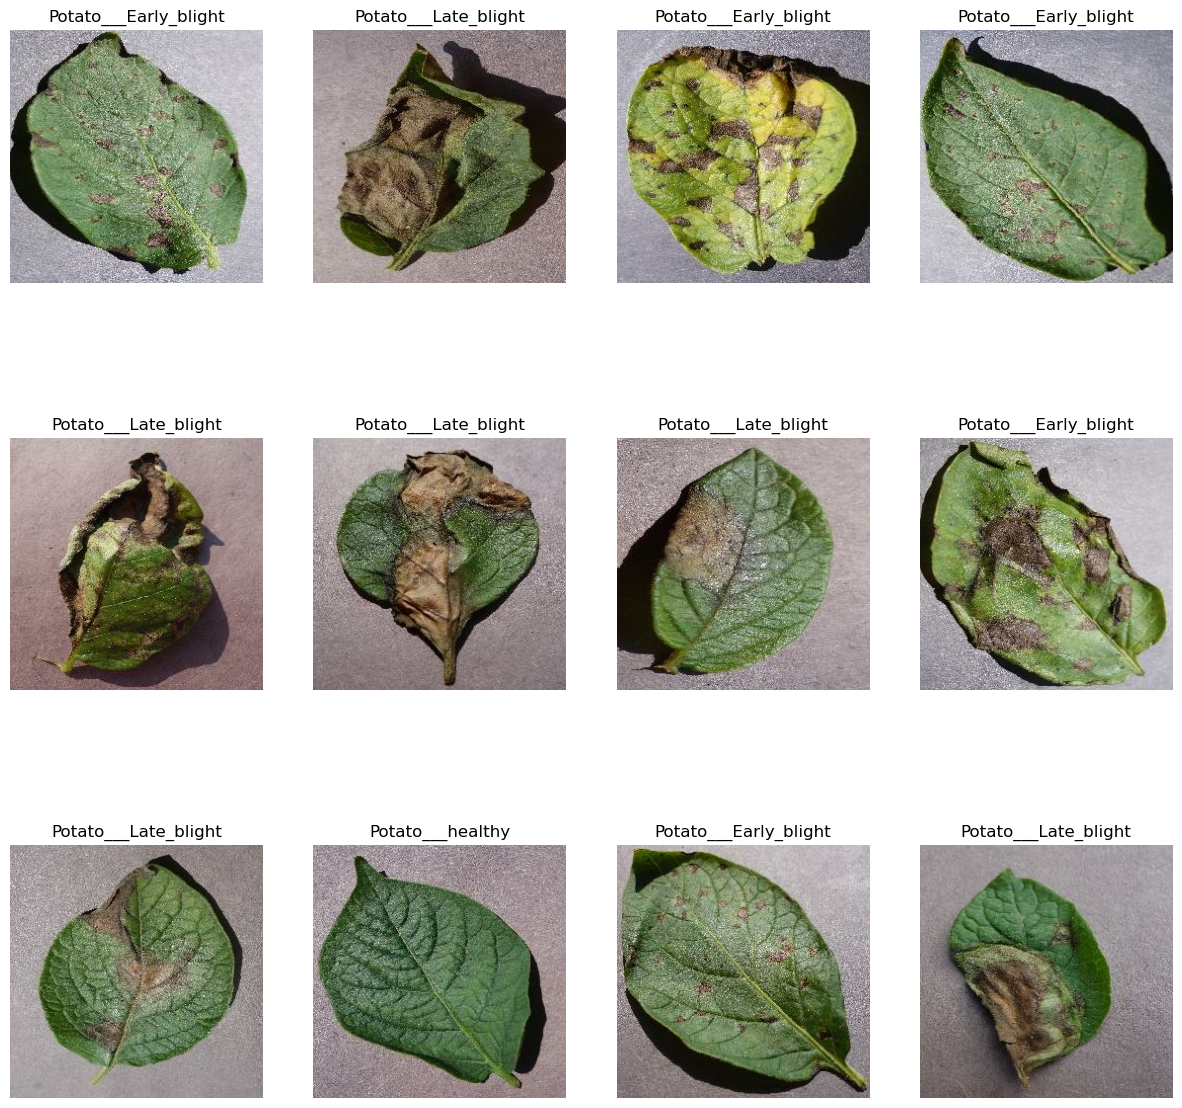

In [ ]:
plt.figure(figsize=(15,15))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")


# Split Data collection
training ==> 80%
test     ==> 10%
validation =>10%


In [ ]:
def get_dataset_spliting(ds):
    '''A function to split a data set into 3 parts'''
    train_size = 0.8
    len(ds)*train_size
    train_ds = ds.take(54)                   # arr[:54]
    len(train_ds)

    test_ds =dataset.skip(54)                   # arr[54:]
    len(test_ds)


    val_size = 0.1
    len(ds)*val_size
    val_ds =test_ds.take(6)
    len(val_ds)

    test_ds = test_ds.skip(6)
    len(test_ds)

    return train_ds , val_ds , test_ds


In [ ]:
train_ds , val_ds , test_ds = get_dataset_spliting(dataset)

In [ ]:
len(train_ds),len(val_ds),len(test_ds)

(54, 6, 8)

# Optimize Dataset For Fast Training Perfromance

In [ ]:
''' leting tensorflow determine how many batces to load while GPU is training to improve performance'''

train_ds =train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

val_ds =val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

test_ds =test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


# Pre-processing dataset

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE), # to resize any image not 255 into 255
    layers.experimental.preprocessing.Rescaling(1.0/255) #To rescale an input in the [0, 255] To make it Rgb
])

# Data Augmentation

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"), # API
    layers.experimental.preprocessing.RandomRotation(0.2)                    # API
])

#  Build our Convolutional Neural Network


In [ ]:
input_shape= (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),        # Convolution layer 1
    layers.MaxPooling2D((2,2)),               # Convolution layer 2
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),              # # Convolution layer 3
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),              # Convolution layer 4
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),              # Convolution layer 5
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),              # Convolution layer 6
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),                        #  Flatten Layers
    layers.Dense(64 , activation='relu'),      # Dense activation layer
    layers.Dense(n_classes ,activation ='softmax' ), # last layer will have 3 neurous


])

model.build(input_shape=input_shape) #API model

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

# Define Optimizer

In [ ]:
model.compile(
    optimizer ='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics =['accuracy']


)

In [ ]:
history = model.fit(
    train_ds,
    epochs=EPOCHES,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds



)

Epoch 1/10
54/54 [==============================] - 243s 4s/step - loss: 0.9033 - accuracy: 0.5041 - val_loss: 0.9762 - val_accuracy: 0.4479
Epoch 2/10
54/54 [==============================] - 195s 4s/step - loss: 0.6273 - accuracy: 0.7228 - val_loss: 0.5216 - val_accuracy: 0.7969
Epoch 3/10
54/54 [==============================] - 209s 4s/step - loss: 0.3836 - accuracy: 0.8339 - val_loss: 0.3193 - val_accuracy: 0.8542
Epoch 4/10
54/54 [==============================] - 216s 4s/step - loss: 0.3049 - accuracy: 0.8808 - val_loss: 0.2918 - val_accuracy: 0.8750
Epoch 5/10
54/54 [==============================] - 251s 5s/step - loss: 0.2517 - accuracy: 0.8999 - val_loss: 0.2391 - val_accuracy: 0.9010
Epoch 6/10
54/54 [==============================] - 228s 4s/step - loss: 0.1981 - accuracy: 0.9196 - val_loss: 0.2272 - val_accuracy: 0.9010
Epoch 7/10
54/54 [==============================] - 226s 4s/step - loss: 0.1645 - accuracy: 0.9387 - val_loss: 0.1656 - val_accuracy: 0.9219
Epoch 8/10
54

In [ ]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 9s 836ms/step - loss: 0.2266 - accuracy: 0.9052


In [ ]:
scores

[0.22656477987766266, 0.9051724076271057]

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['accuracy']

[0.4965277910232544,
 0.6574074029922485,
 0.7488425970077515,
 0.8559027910232544,
 0.8674768805503845,
 0.8958333134651184,
 0.8935185074806213,
 0.9195601940155029,
 0.9461805820465088,
 0.9525462985038757]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


Text(0.5, 1.0, 'Training and Validation loss')

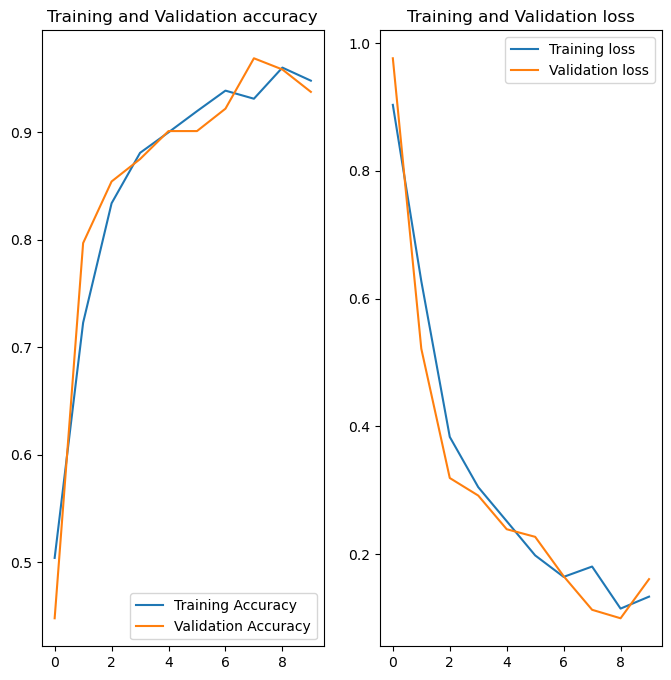

In [ ]:
# show accuracy graph
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHES),acc,label='Training Accuracy')
plt.plot(range(EPOCHES),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation accuracy')

# show loss graph
plt.subplot(1,2,2)
plt.plot(range(EPOCHES),loss,label='Training loss')
plt.plot(range(EPOCHES),val_loss,label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')

# Make a Prediction

First image to predict
Actual label : Potato___Late_blight
1/1 [==============================] - 1s 809ms/step
predicted label :  Potato___Late_blight


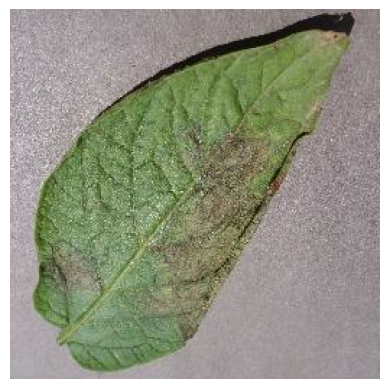

In [ ]:
import numpy as np


for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label :",class_names[first_label])

    batch_prediction =model.predict(image_batch)
    #print ("predicted label : ",(batch_prediction[0]))
    #print(np.argmax(batch_prediction[0]))
    print ("predicted label : ",class_names[np.argmax(batch_prediction[0])])





    plt.axis('off')

In [ ]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
